## Carga de módulos

In [21]:
import warnings
import numpy as np
import pandas as pd
import missingno as msno
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from utilities.utils import normal_test

warnings.filterwarnings(action="ignore")
pd.set_option("float_format", '{:.2f}'.format)

In [3]:
housing = pd.read_csv("https://raw.githubusercontent.com/stivenlopezg/DS-ONLINE-76/master/data/housing.csv")
print(f"El set de datos tiene {housing.shape[0]} observaciones, y {housing.shape[1]} columnas.")
housing.head()

El set de datos tiene 20640 observaciones, y 10 columnas.


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,NEAR BAY
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,NEAR BAY
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,NEAR BAY
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,NEAR BAY
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### Estadísticas descriptivas

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,537.87,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,421.39,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


* Parece que **housing_median_age**, **median_income**, y tal vez **household** son normales.
* Las demás variables deben tener un sesgo positivo o negativo.

In [6]:
housing.describe(exclude="number")

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


### Datos missing

<AxesSubplot:>

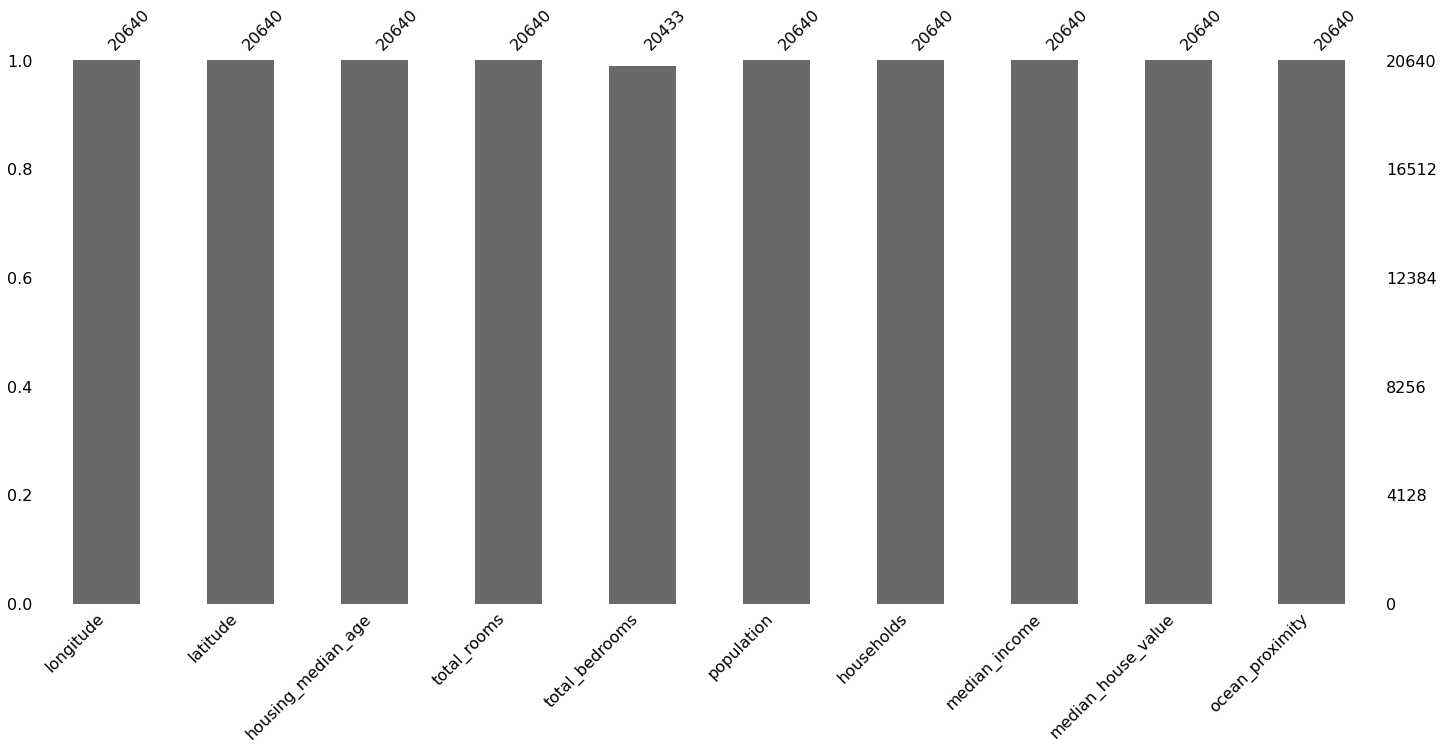

In [8]:
msno.bar(df=housing)

<AxesSubplot:>

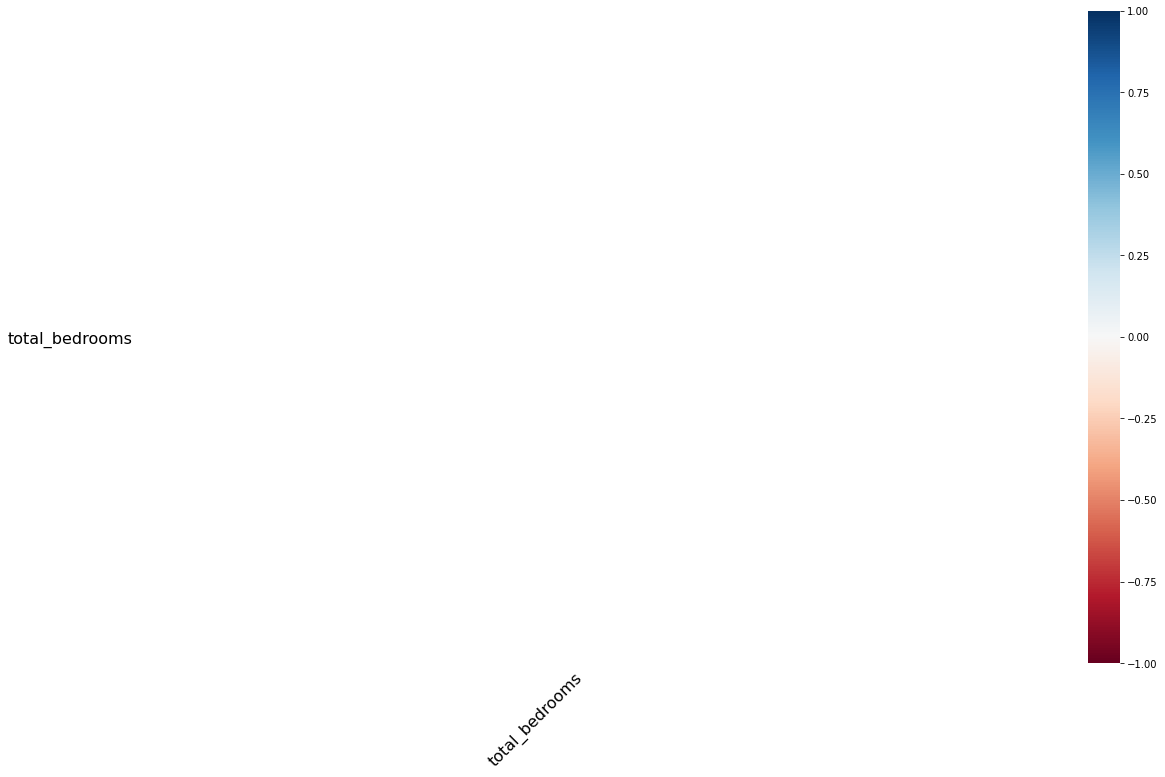

In [9]:
msno.heatmap(df=housing)

## Análisis exploratorio de datos

### Análisis univariado

* Numéricas (histograma, boxplot, ecdf, etc).
* Categóricas (Gráficos de barras)

### Análisis bivariado

Quiero encontrar si existe relación o asociación entre un par de variables.

* Continuas vs continuas (Scatterplot)
* Continuas vs categóricas (Boxplot, Pointplot, Coordenadas paralelas)
* Categóricas vs categóricas (Tablas de contingencia, la matriz de calor de la tabla de contingencia)

### Análisis multivariado

Quiero ver como se relacionan todas las variables.

* Clustering
* Técnicas de reducción de la dimensionalidad.

## Análisis Univariado

In [10]:
cols_to_drop = ["longitude", "latitude"]

housing.drop(labels=cols_to_drop, axis="columns", inplace=True)

In [11]:
numerical_features = housing.select_dtypes(include="number").columns.tolist()
categorical_features = [col for col in housing.columns if col not in numerical_features]

In [14]:
import seaborn as sns

La variable housing_median_age: 



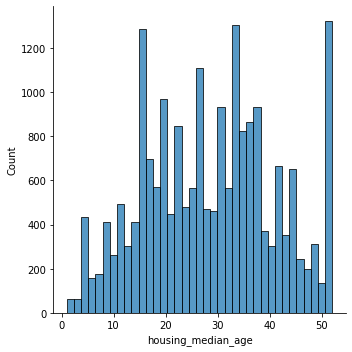

-----------------------------------------------------------------------------------------------------------
La variable total_rooms: 



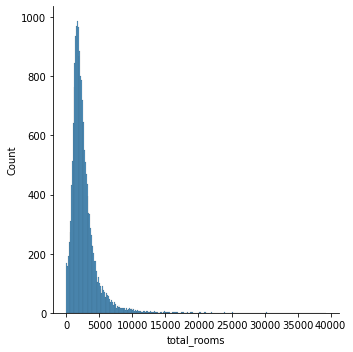

-----------------------------------------------------------------------------------------------------------
La variable total_bedrooms: 



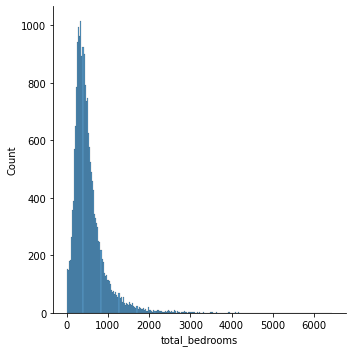

-----------------------------------------------------------------------------------------------------------
La variable population: 



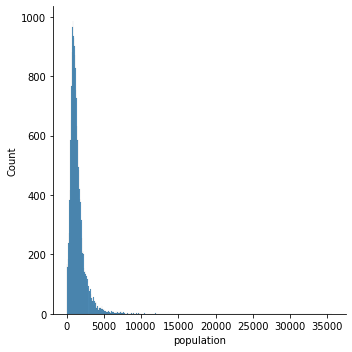

-----------------------------------------------------------------------------------------------------------
La variable households: 



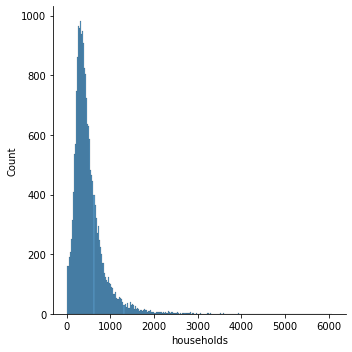

-----------------------------------------------------------------------------------------------------------
La variable median_income: 



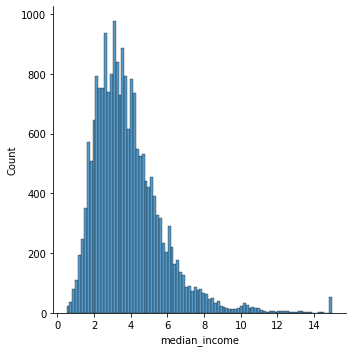

-----------------------------------------------------------------------------------------------------------
La variable median_house_value: 



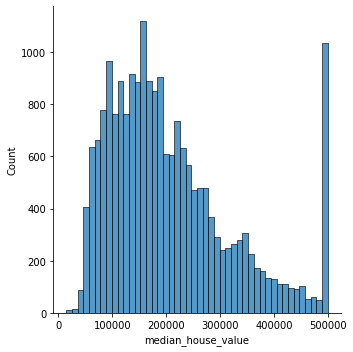

-----------------------------------------------------------------------------------------------------------


In [20]:
for col in numerical_features:
    print(f"La variable {col}: \n")
    sns.displot(data=housing, x=col)
    plt.show()
    print("-----------------------------------------------------------------------------------------------------------")

In [26]:
for col in numerical_features:
    print(f"Para la variable {col}")
    normal_test(data=housing.dropna(), column=col, method="anderson")
    print("----------------------------------------------------------------------------------------------------------- \n")

Para la variable housing_median_age
Para housing_median_age con la prueba de Anderson-Darling: 

Estadistico: 87
Para un nivel de significancia: 5.0 y un valor critico de: 0.787 
La muestra no parece Gaussiana (Se rechaza H0).
----------------------------------------------------------------------------------------------------------- 

Para la variable total_rooms
Para total_rooms con la prueba de Anderson-Darling: 

Estadistico: 1243
Para un nivel de significancia: 5.0 y un valor critico de: 0.787 
La muestra no parece Gaussiana (Se rechaza H0).
----------------------------------------------------------------------------------------------------------- 

Para la variable total_bedrooms
Para total_bedrooms con la prueba de Anderson-Darling: 

Estadistico: 1113
Para un nivel de significancia: 5.0 y un valor critico de: 0.787 
La muestra no parece Gaussiana (Se rechaza H0).
----------------------------------------------------------------------------------------------------------- 

Para la